# NEXT GEN STATS

link a los datos (en este caso 2020,2021 y 2022 .cvs)
https://github.com/nflverse/nflverse-data/releases/tag/nextgen_stats

In [1]:
import gzip
import pandas as pd

file_path = "C:\\Users\\juana\\OneDrive\\Escritorio\\ML_NFL\\ngs_2022_passing.csv.gz"

# Abre el archivo comprimido en modo lectura utilizando gzip
with gzip.open(file_path, "rt") as file:
    # Lee el archivo utilizando pandas
    df_NGS_p = pd.read_csv(file)

# Ya podemos trabajar con el dataframe df
print(df_NGS_p.head())


   season season_type  week player_display_name player_position team_abbr  \
0    2022         REG     0         Sam Darnold              QB       CAR   
1    2022         REG     0           Matt Ryan              QB       IND   
2    2022         REG     0       Lamar Jackson              QB       BAL   
3    2022         REG     0         Cooper Rush              QB       DAL   
4    2022         REG     0      Ryan Tannehill              QB       TEN   

   avg_time_to_throw  avg_completed_air_yards  avg_intended_air_yards  \
0           3.236891                 6.852073                9.097983   
1           2.686250                 5.222039                6.384533   
2           2.999117                 6.087044                8.810419   
3           2.569224                 6.339574                8.220637   
4           2.734272                 6.282453                7.913091   

   avg_air_yards_differential  ...  completion_percentage  \
0                   -2.245910  ...   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Mostrar columnas en su totalidad
pd.set_option('display.max_columns', None)

In [3]:
df_NGS_p

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2022,REG,0,Sam Darnold,QB,CAR,3.236891,6.852073,9.097983,-2.245910,15.000000,58.459467,0.644202,140,1143,7,3,92.648810,82,58.571429,55.702710,2.868719,22.874466,58.459467,00-0034869,Sam,Darnold,14,S.Darnold
1,2022,REG,0,Matt Ryan,QB,IND,2.686250,5.222039,6.384533,-1.162494,16.268980,51.879789,-2.601800,461,3057,14,13,83.943420,309,67.028200,66.105471,0.922729,18.853119,51.879789,00-0026143,Matthew,Ryan,2,M.Ryan
2,2022,REG,0,Lamar Jackson,QB,BAL,2.999117,6.087044,8.810419,-2.723375,11.042945,63.211078,-0.367000,326,2242,17,7,91.065951,203,62.269939,64.677069,-2.407131,22.132994,63.948262,00-0034796,Lamar,Jackson,8,L.Jackson
3,2022,REG,0,Cooper Rush,QB,DAL,2.569224,6.339574,8.220637,-1.881062,20.370370,47.203687,-0.390828,162,1051,5,3,80.041152,94,58.024691,63.981690,-5.956999,22.174819,49.632499,00-0033662,Cooper,Rush,10,C.Rush
4,2022,REG,0,Ryan Tannehill,QB,TEN,2.734272,6.282453,7.913091,-1.630639,18.461538,61.708944,-0.957571,325,2536,13,6,94.596154,212,65.230769,64.136048,1.094721,20.704539,61.708944,00-0029701,Ryan,Tannehill,17,R.Tannehill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2022,POST,21,Joe Burrow,QB,CIN,2.653488,5.724231,7.924865,-2.200634,21.951220,42.817959,-1.102162,41,270,1,2,70.172764,26,63.414634,59.843121,3.571513,22.571798,44.879369,00-0036442,Joe,Burrow,9,J.Burrow
599,2022,POST,21,Jalen Hurts,QB,PHI,2.894600,4.248000,8.940000,-4.692000,16.000000,36.346341,0.565000,25,121,0,0,72.250000,15,60.000000,60.882896,-0.882896,23.167578,47.861153,00-0036389,Jalen,Hurts,1,J.Hurts
600,2022,POST,21,Patrick Mahomes,QB,KC,2.939558,4.833793,6.250976,-1.417183,9.302326,39.176016,-2.407561,43,326,2,0,105.377907,29,67.441860,69.127680,-1.685819,19.153173,49.895653,00-0033873,Patrick,Mahomes,15,P.Mahomes
601,2022,POST,23,Patrick Mahomes,QB,KC,2.689000,4.342857,5.914000,-1.571143,7.407407,31.477357,-2.126000,27,182,3,0,131.790123,21,77.777778,68.630475,9.147302,18.186809,47.231262,00-0033873,Patrick,Mahomes,15,P.Mahomes


In [4]:
# Si filtramos a la semana 0, nos muestra estadísticas de la temporada completa
df_NGS_p = df_NGS_p[df_NGS_p['week'] == 0]

df_NGS_p = df_NGS_p.reset_index()

In [5]:
# Calcula el tiempo media para lanzar y el % de pase completo por encima de lo esperado
average_ttt = df_NGS_p['avg_time_to_throw'].mean()
average_cpae = df_NGS_p['completion_percentage_above_expectation'].mean()

print(average_ttt)
print(average_cpae)

2.8092748839534543
-0.9720986283871241


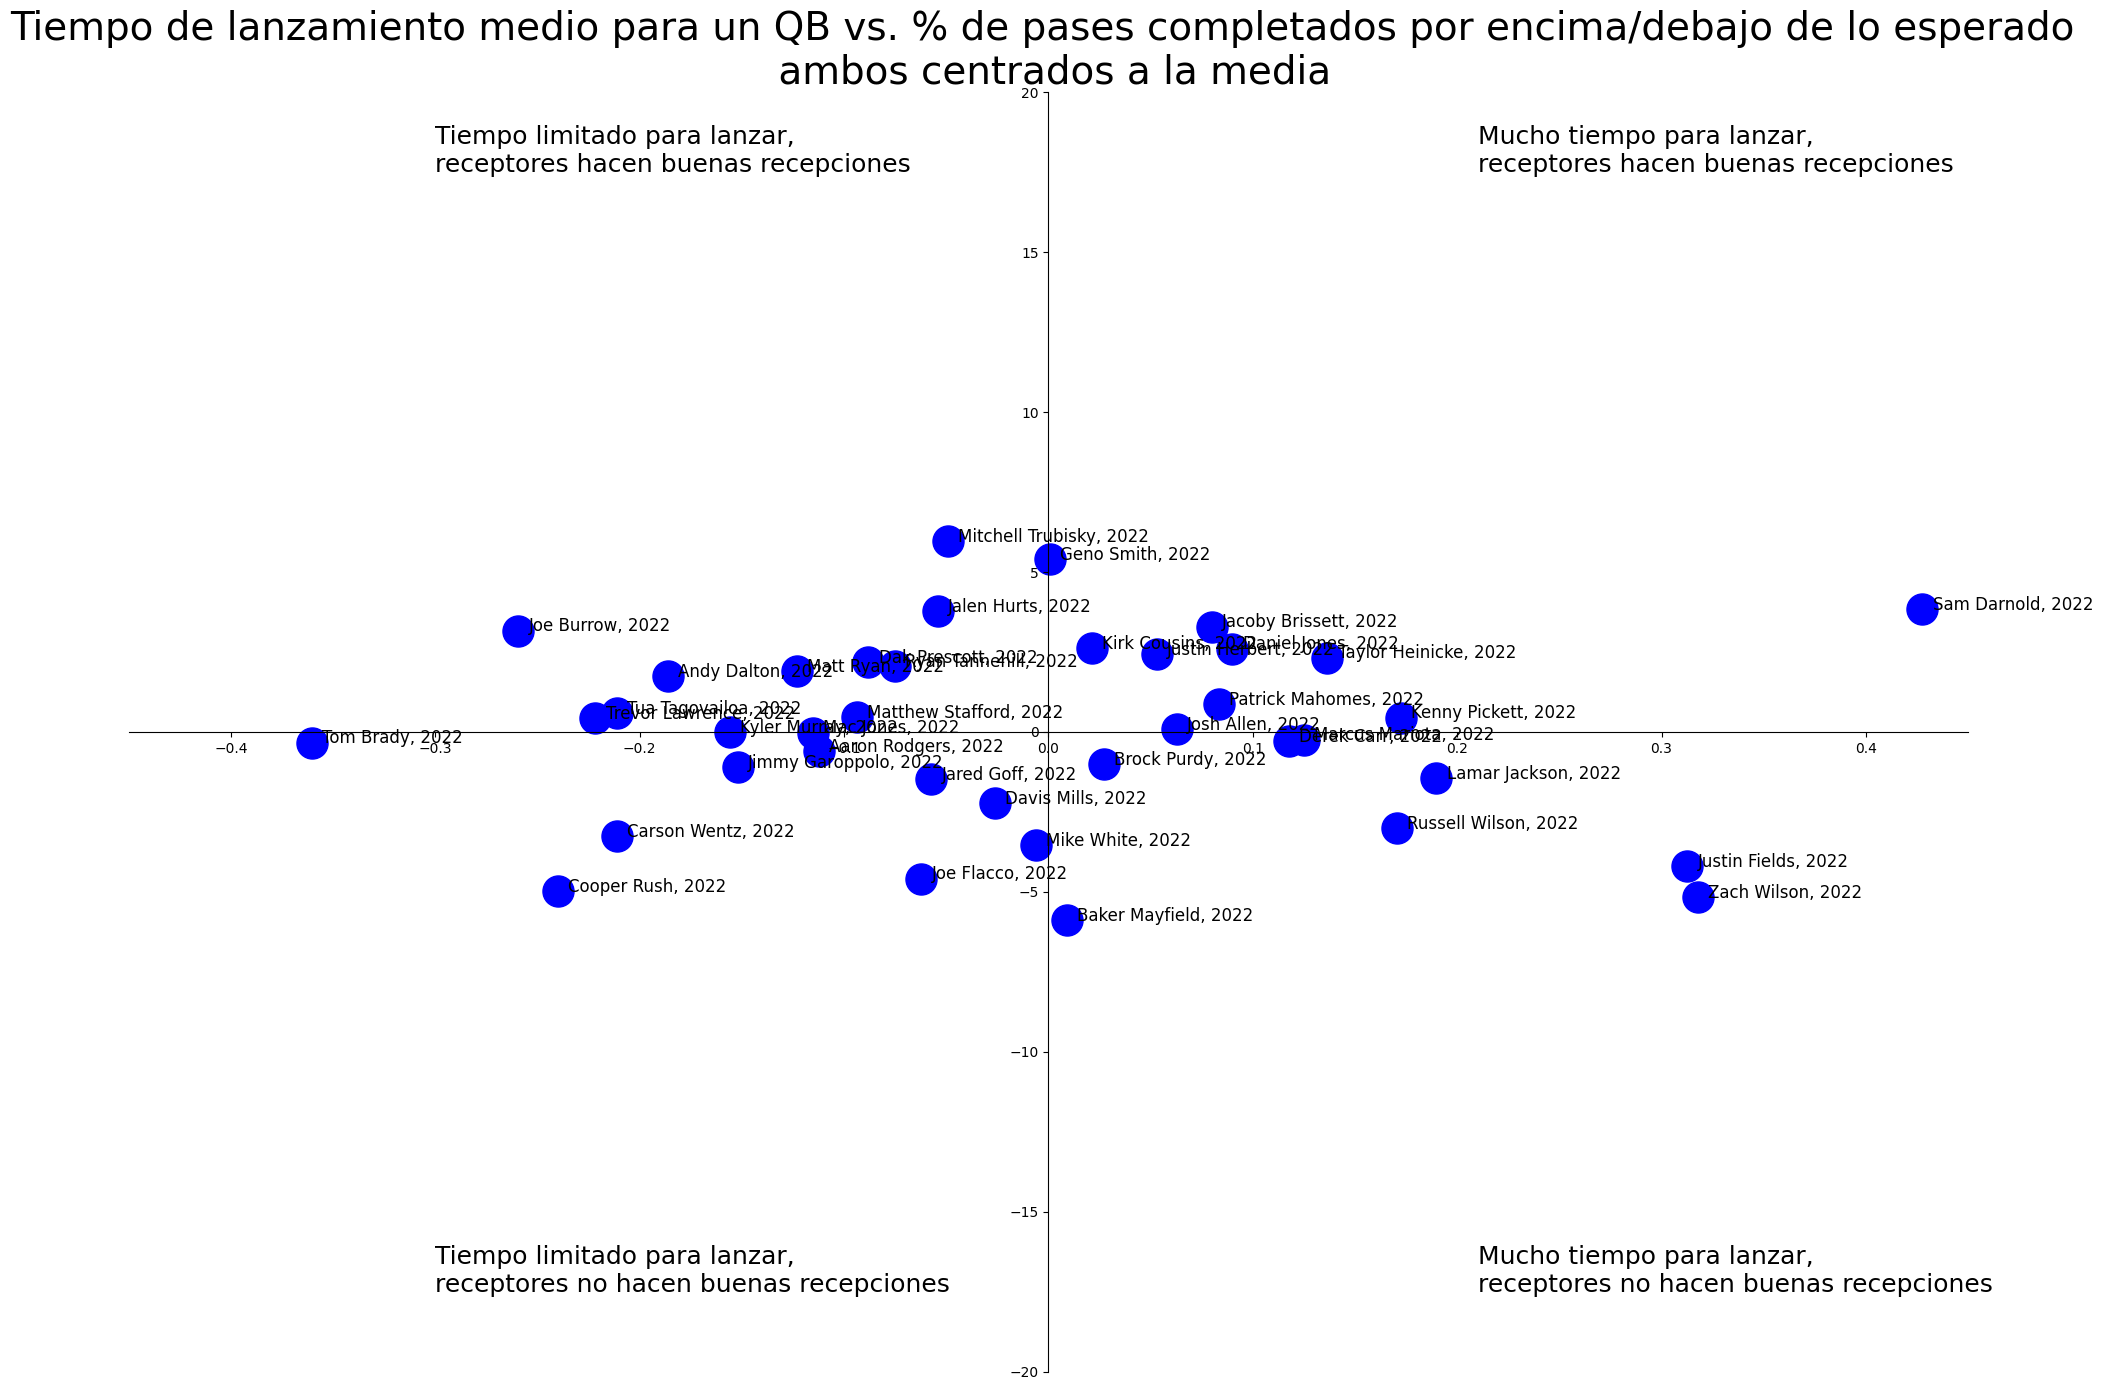

In [6]:
# Visualización de datos

# Se define el gráfico
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True


# Listas vacías para X e Y
x = []
y = []

# Se definen las variables X e Y
for QB in df_NGS_p.index:
    x.append(df_NGS_p['avg_time_to_throw'][QB] - average_ttt)
    y.append(df_NGS_p['completion_percentage_above_expectation'][QB] - average_cpae)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Se define el gráfico
fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s=500, c='blue')

# Movemos los ejes X e Y para que pasen por el centro (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Terminamos de configurar los ejes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Definimos los límites de los ejes X e Y
plt.xlim((-0.45,0.45))
plt.ylim((-20,20))

# Se anota cada QB con su respectivo nombre y año
for nameyear in xy.index:
    plt.annotate(f"{df_NGS_p['player_display_name'][nameyear]}, {df_NGS_p['season'][nameyear]}",\
                 (xy['x'][nameyear] + 0.005,
                  xy['y'][nameyear] - 0.025),
                  fontsize=12)

# Cuadrantes
plt.annotate('Mucho tiempo para lanzar,\nreceptores hacen buenas recepciones', (0.21,17.5), fontsize=18)
plt.annotate('Tiempo limitado para lanzar,\nreceptores hacen buenas recepciones', (-0.3,17.5), fontsize=18)
plt.annotate('Tiempo limitado para lanzar,\nreceptores no hacen buenas recepciones', (-0.3,-17.5), fontsize=18)
plt.annotate('Mucho tiempo para lanzar,\nreceptores no hacen buenas recepciones', (0.21,-17.5), fontsize=18)
    

# Se añade un título
plt.title(f'Tiempo de lanzamiento medio para un QB vs. % de pases completados por encima/debajo de lo esperado \n ambos centrados a la media',
         fontdict={'fontsize': 28})

    
# Se muestra
plt.show()